# Introduction
feature로 '직전 거래대금'을 넣어주면 어떻게 될까?  
유튜브1: https://youtu.be/SzcNpodfqlg    
유튜브2: https://youtu.be/E-81VwqxAXI

# Logistic Regression

### Import

In [239]:
import pandas as pd
import numpy as np
import datetime

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics

### Load

In [240]:
df = pd.read_csv('data.csv')

### Preprocessing

In [241]:
df['수익률'] = df['수익률'].apply(lambda x : 1 if x > 0 else 0 )

In [242]:
df['양봉개수'] = df['양봉개수'].astype('float64')
df['뉴스기사'] = df['뉴스기사'].astype('float64')
df['매수등락률'] = df['매수등락률'].astype('float64')
df['직전 거래대금'] = df['직전 거래대금'].astype('float64')
df['최대거래대금'] = df['최대거래대금'].astype('float64')

In [243]:
X = df[['직전 거래대금', '최대거래대금', '뉴스기사', '매수등락률', '양봉개수']]
y = df['수익률']

### Train Test Split

In [244]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### Scaling

In [245]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Model

In [246]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Score

In [247]:
print('훈련 세트 점수: {:.2f}'.format(logreg100.score(X_train, y_train)))
print('테스트 세트 점수: {:.2f}'.format(logreg100.score(X_test, y_test)))

훈련 세트 점수: 0.66
테스트 세트 점수: 0.56


### Confusion Matrix

In [248]:
y_pred = logreg100.predict(X_test)

In [249]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[15,  2],
       [13,  4]], dtype=int64)

### Visualization

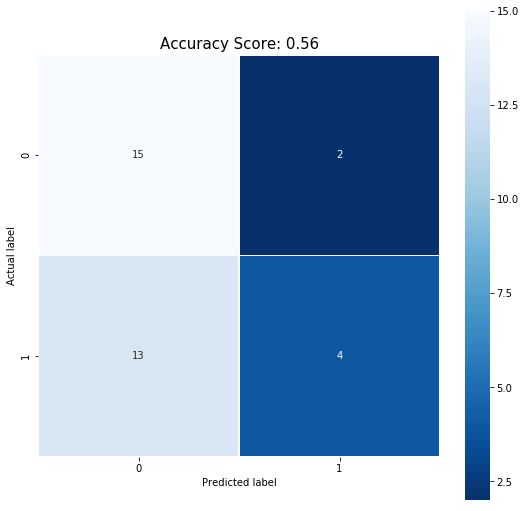

In [250]:
plt.figure(figsize=(9,9))
sns.heatmap(cnf_matrix, annot=True, linewidths=.5, square=True, cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

score = round(logreg100.score(X_test, y_test),2)
title = 'Accuracy Score: {0}'.format(score)
plt.title(title, size=15)

plt.show()

In [254]:
y_test[:5]

127    1
66     0
104    1
19     0
42     0
Name: 수익률, dtype: int64

In [252]:
len(y_test[y_test > 0]) / len(y_test)

0.5

### Prediction
'직전 거래대금', '최대거래대금', '뉴스기사', '매수등락률', '양봉개수'

In [255]:
before_volume = 17
max_volume = 60
news = 1
change = 12
count = 3

In [256]:
x_predict = scaler.transform([[before_volume, max_volume, news, change, count]])

prediction = logreg100.predict(x_predict)
probability = logreg100.predict_proba(x_predict)

if prediction == 1:
    print('성공')
    print(round(probability[0][1],2))
else:
    print('실패')
    print(round(probability[0][0],2))

실패
0.56


# Results
score = 0.56

# Conclusion
feature로 '직전 거래대금'을 추가하니 수익(1)도 전보다 더 많이 맞추게 되면서 Score가 증가하였다.